# Tasca del test d'hipòtesis

**Descripció**  
Aprèn a realitzar test d'hipòtesis amb Python.

In [1]:
import pandas as pd
import numpy as np
import random
import statistics as st
import scipy 

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.simplefilter('ignore')

In [2]:
PATH = '../data-sources/'

dtypes = {'position':'category', 'team':'category'}
mlb = pd.read_csv(PATH+'mlbBat10.txt', sep='\t', dtype=dtypes)


Recordem les dades [mlbBat10.txt](./data-sources/mlbBat10.txt). La descripció dels camps la trobem [aquí](https://www.openintro.org/data/index.php?data=mlbbat10)

Format
A data frame with 1199 observations on the following 19 variables.

|camp|descripció|
|-|-|
|**name**|Player name|
|**team**|Team abbreviation|
|**position**|Player position|
|**G** game|Number of games|
|**AB** at_bat|Number of at bats|
|**R** run|Number of runs|
|**H** hit|Number of hits|
|**2B** double|Number of doubles|
|**3B** triple|Number of triples|
|**HR** home_run|Number of home runs|
|**RBI** rbi|Number of runs batted in|
|**TB** total_base|Total bases, computed as 3HR + 23B + 1*2B + H|
|**BB** walk|Number of walks|
|**SO** strike_out|Number of strikeouts|
|**SB** stolen_base|Number of stolen bases|
|**CS** caught_stealing|Number of times caught stealing|
|**OBP** obp|On base percentage|
|**SLG** slg|Slugging percentage (total_base / at_bat)|
|**AVG** bat_avg|Batting average|

In [3]:
mlb.describe().T

,count,mean,std,min,25%,50%,75%,max
G,1199.0,50.534612,49.544371,1.0,8.0,31.000,84.000,162.0
AB,1199.0,137.909091,188.126913,0.0,1.0,37.000,225.000,680.0
R,1199.0,17.771476,27.051262,0.0,0.0,3.000,26.500,115.0
H,1199.0,35.491243,51.908498,0.0,0.0,6.000,56.000,214.0
2B,1199.0,7.077565,10.812941,0.0,0.0,1.000,11.000,49.0
3B,1199.0,0.722269,1.601990,0.0,0.0,0.000,1.000,14.0
HR,1199.0,3.847373,7.372345,0.0,0.0,0.000,4.000,54.0
RBI,1199.0,16.920767,26.636637,0.0,0.0,2.000,25.000,126.0
TB,1199.0,55.555463,83.717936,0.0,0.0,8.000,82.500,351.0
BB,1199.0,13.159299,20.737459,0.0,0.0,2.000,20.000,114.0


In [4]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      1199 non-null   object  
 1   team      1199 non-null   category
 2   position  1199 non-null   category
 3   G         1199 non-null   int64   
 4   AB        1199 non-null   int64   
 5   R         1199 non-null   int64   
 6   H         1199 non-null   int64   
 7   2B        1199 non-null   int64   
 8   3B        1199 non-null   int64   
 9   HR        1199 non-null   int64   
 10  RBI       1199 non-null   int64   
 11  TB        1199 non-null   int64   
 12  BB        1199 non-null   int64   
 13  SO        1199 non-null   int64   
 14  SB        1199 non-null   int64   
 15  CS        1199 non-null   int64   
 16  OBP       1199 non-null   float64 
 17  SLG       1199 non-null   float64 
 18  AVG       1199 non-null   float64 
dtypes: category(2), float64(3), int64(13), object(1)

In [5]:
mlb.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


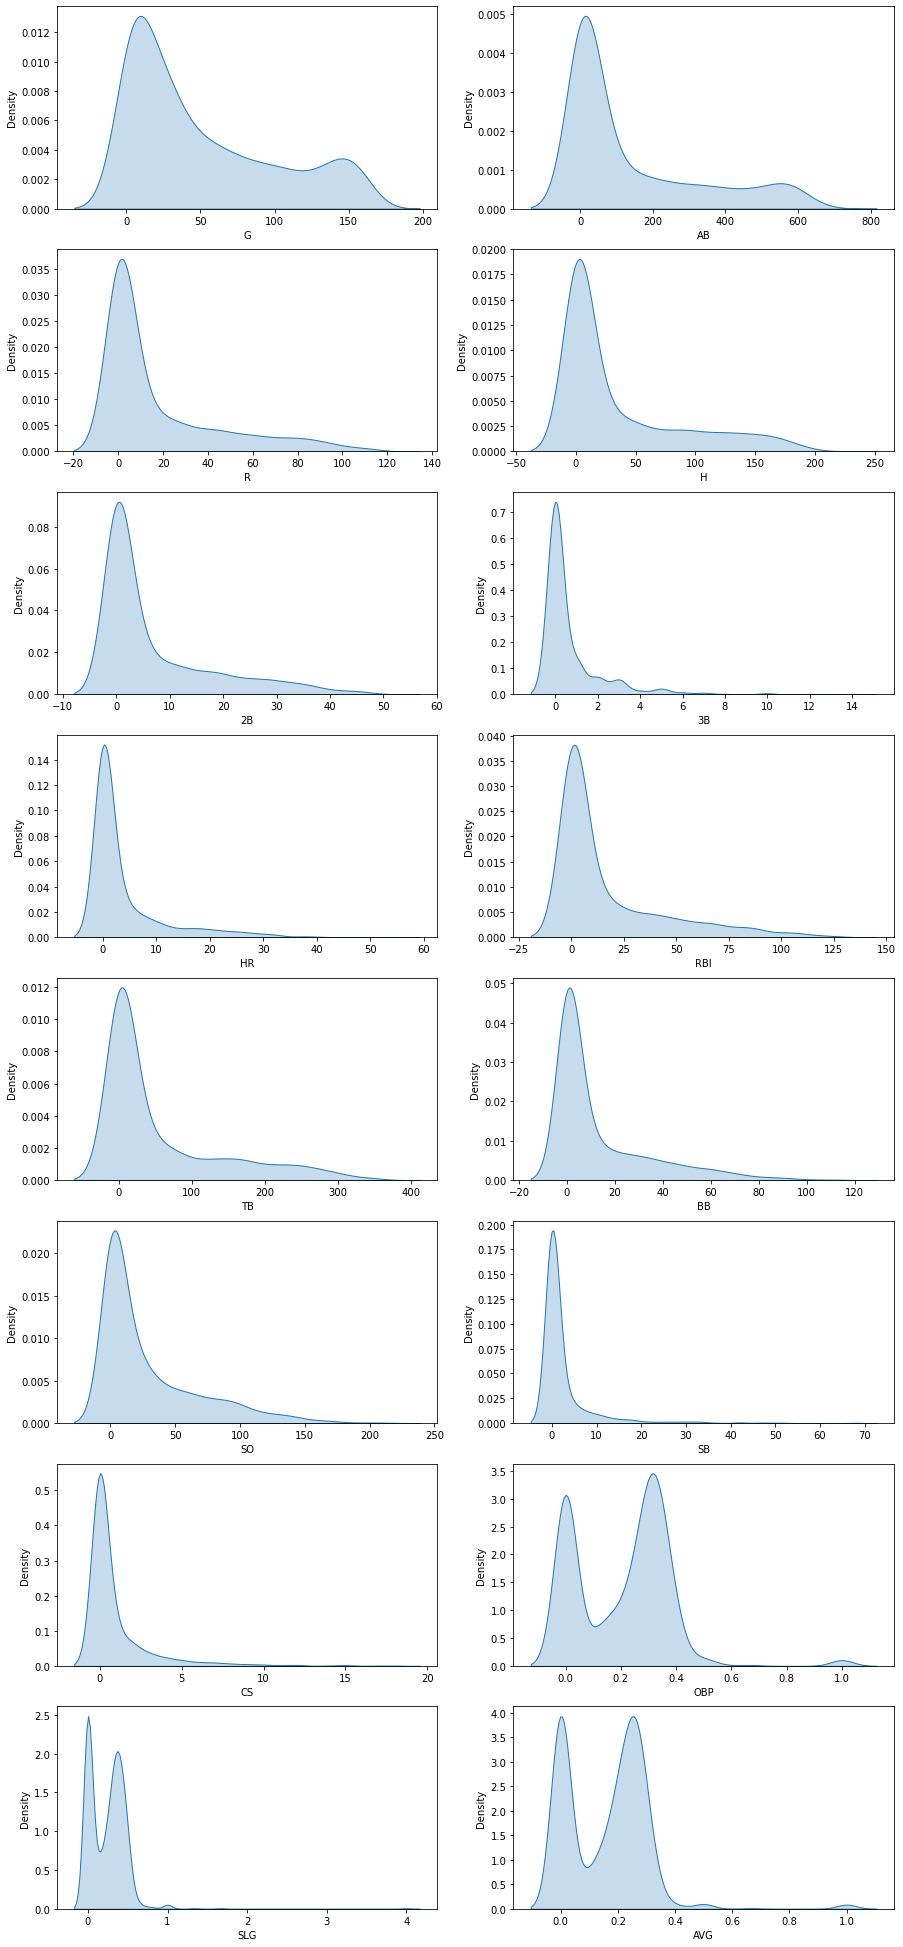

In [6]:
cols_num = mlb._get_numeric_data().columns

fig, axes = plt.subplots(len(cols_num)//2, 2, figsize=(15,35))

for col, ax in zip(cols_num, axes.flatten()):
    sns.kdeplot(mlb[col], shade=True, ax=ax)
#     ax.set_title(col)



In [7]:
np.corrcoef(mlb.AVG, (mlb.H/mlb.AB).fillna(0))

array([[1.        , 0.99999882],
       [0.99999882, 1.        ]])

In [8]:
mlb.H.value_counts().sort_index(ascending=False)

214      1
200      1
197      1
189      2
188      1
      ... 
4       23
3       29
2       32
1       65
0      407
Name: H, Length: 176, dtype: int64

## Nivell 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Hem escollit el Mlbbat10.txt, i l'hem carregat (la separació entre camps es un tabulador)

- Agafem l'atribut ```AVG```


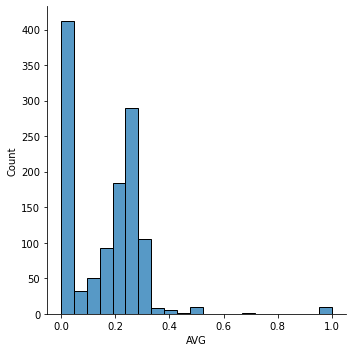

In [9]:
dades = mlb.AVG
sns.displot(dades, kind='hist')

Observem que no hi sembla una distribució normal. Ho comprovem, fent una hipòtesi:

$$ \begin{align}
&\text{H}_0 : X \sim \mathcal{N}(\mu, \sigma^2) \\
&\text{H}_1 : X \nsim \mathcal{N}(\mu, \sigma^2) \\
&\alpha = 0.05
\end{align}
$$

Bàsicament definim la hipòtesi nul·la com que la distribució _X_ es normal. 


In [10]:

k2, p = scipy.stats.normaltest(dades)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  
    print("Podem rebutjar la hipòtesi nul·la")
else:
    print("No podem rebutjar la hipòtesi nul·la")

p = 5.88119e-88
Podem rebutjar la hipòtesi nul·la


##### Considerarem els jugadors que, al menys, han provat 10 batades ```mlb.AB >= 10```.

p = 1.75007e-20
Podem rebutjar la hipòtesi nul·la


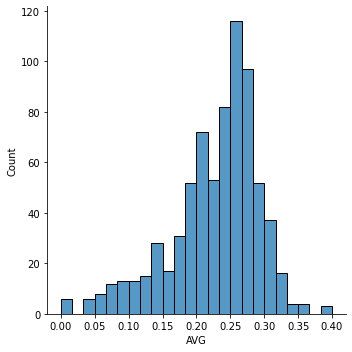

In [11]:
filtre = mlb.AB >= 10
dades = mlb[filtre].AVG.copy()
sns.displot(dades, kind='hist')

k2, p = scipy.stats.normaltest(dades)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  
    print("Podem rebutjar la hipòtesi nul·la")
else:
    print("No podem rebutjar la hipòtesi nul·la")

In [12]:
# Shapiro-Wilk

k2, p = scipy.stats.shapiro(dades)
alpha = 0.05
print(f'p = {p}')
if p < alpha:  
    print("Podem rebutjar la hipòtesi nul·la")
else:
    print("No podem rebutjar la hipòtesi nul·la")

p = 3.6604912627398814e-16
Podem rebutjar la hipòtesi nul·la


## Nivell 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Seleccionem el camp `AVG` i definim la hipòtesi:

- $H_0$: $ \mu_p \ge \mu_o \equiv \mu_p - \mu_o \ge 0$ els jugadors a la posició Pitcher que han batejat 10 cops o més tenen el mateix, o més, percentatge de bateig que la resta que han batejat 10 cops o més

- $H_1$: $ \mu_p \lt \mu_o \equiv \mu_p - \mu_o < 0$ els Pitchers tenen pitjor percentatge de bateig que la resta (amb bateig de 10 cops o més)

$\alpha = 0.05$ 



#### Fem servir el test de Welch (no podem asumir que les variances siguin iguals)

Informació sobre el [test de Welch ](https://en.wikipedia.org/wiki/Welch%27s_t-test)
$$
\textit{T}(\textbf{X}, \textbf{Y}) = \frac{\left| \bar{X} - \bar{Y} \right|}{\sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}}
$$

i els degrees of freedom:

$$
\textit{v} = \bigg(\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}\bigg)^2 / \bigg( \frac{(s_x^2/n_x)^2}{n_x-1} + \frac{(s_y^2/n_y)^2}{n_y-1}
\bigg)
$$

s'implementa a [scikit-learn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) amb el paràmetre ```equal_var = False```


In [13]:
filtre = mlb.AB >= 10
dades = mlb[filtre].copy()
sample = dades.sample(200)
pitcher = sample.position == 'P'

alpha = 0.05

sample_p = sample[pitcher].AVG
sample_np = sample[~pitcher].AVG

st, p = scipy.stats.ttest_ind(sample_p,sample_np, equal_var=False, alternative='less')

print(f'p = {p}\nvalor estadística: {st}')
if p < alpha:  
    print("Podem rebutjar la hipòtesi nul·la")
else:
    print("No podem rebutjar la hipòtesi nul·la")

p = 4.1851613754637484e-08
valor estadística: -6.822597490399954
Podem rebutjar la hipòtesi nul·la


#### Provem amb bootstraping

> Ens basarem en diversos documents, però especialment en [aquest](https://www.cienciadedatos.net/documentos/pystats04-bootstrapping-python.html)

Com es tracta de mostres obtingudes de forma aleatòria, amb individus de cadascun dels grups, el mètode de bootstrapping es adeqüat.

Generem un camp per a segmentar pitchers dels altres

In [14]:
filtre = mlb.AB >=10
dades = mlb[filtre].copy()
pitcher = dades.position == 'P'
dades['pos'] = 'NP'
dades.pos.loc[pitcher] = 'P'

In [15]:
dades.groupby('pos').AVG.describe()

,count,mean,std,min,25%,50%,75%,max
pos,,,,,,,,
NP,620.0,0.242360,0.049460,0.0,0.21275,0.250,0.275,0.4
P,117.0,0.142333,0.080151,0.0,0.09100,0.136,0.179,0.4


In [16]:
# diferència observada

dif_obs = dades[pitcher].AVG.mean() - dades[~pitcher].AVG.mean()
print(dif_obs)

-0.10002634408602154


In [17]:
len_p = len(dades[pitcher])
len_np = len(dades[~pitcher])

In [18]:
diffs = []
for _ in range(10000):
    resample = np.random.choice(dades.AVG, size=len(dades), replace=True)
    estadistica1 = np.mean(resample[:len_p])
    estadistica2 = np.mean(resample[len_p:])
    diffs.append(estadistica1-estadistica2)

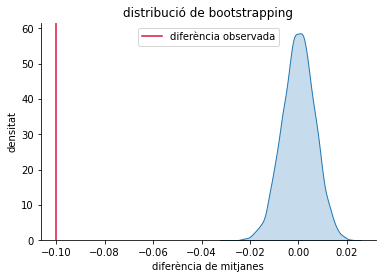

In [19]:
g = sns.kdeplot(diffs, shade=True)
g.axvline(x=dif_obs, c='crimson', label='diferència observada')
g.set_title('distribució de bootstrapping')
g.set_xlabel('diferència de mitjanes')
g.set_ylabel('densitat')
g.legend(loc='upper center')
sns.despine()

In [20]:
# P-value empírico con y sin corrección
# ==============================================================================
p_value = (sum(np.abs(diffs) > np.abs(dif_obs)))/len(diffs)
p_value_correc = (sum(np.abs(diffs) > np.abs(dif_obs)) + 1)/(len(diffs) + 1)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.0
p-value con corrección: 9.999000099990002e-05


#### Intervals de confiança per a la diferència entre poblacions.

L'algoritme de bootstrapping per calcular intervals de confiança de la diferència entre dues poblacions es:
1- Generar una nova pseudo-mostra del grup A de la mateixa mida que la original $n_A$ i utilitzant només observacions d'aquest grup
2- Generar una nova pseudo-mostra del grup B de la mateixa mida que la original $n_B$ i utilitzant només observacions d'aquest grup
3- Calculem la diferència de la estadística entre les dues noves pseudo-mostres.
4- Iterem els pasos 1, 2 i 3 moltes vegades, guardant la diferència calculada a cada iteració. 

> La distribució dels valors generats representa la diferència de la estadística si ambdues mostres provenen de dues poblacions diferents. Aquesta distribució tendirà a estar centrada en el vertader valor de la diferència entre ambdues poblacions.

A partir de la distribución obtenida, generar un intervalo de confianza para el parámetro poblacional. Las mismas consideraciones explicadas para intervalos de confianza en una única población se aplican también a la diferencia entre poblaciones.

In [21]:
pitch = dades[dades.pos=='P'].AVG
no_pitch = dades[dades.pos=='NP'].AVG

size_p = pitch.size
size_np = no_pitch.size

In [22]:
# diferència observada

dif_obs = pitch.mean() - no_pitch.mean()
print(dif_obs)

-0.10002634408602154


In [23]:
# bootstrapping
diffs = []
for _ in range(10000):
    p = np.random.choice(pitch, size=size_p, replace=True)
    no_p = np.random.choice(no_pitch, size=size_np, replace=True)
    
    diffs.append(p.mean()-no_p.mean())
    

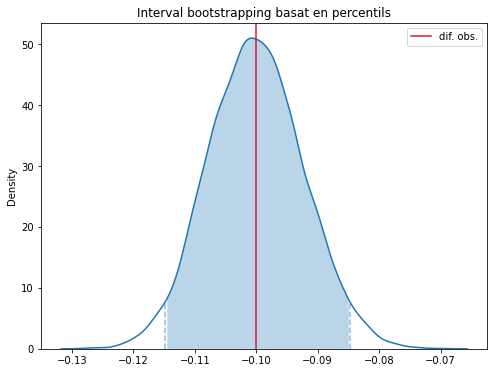

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(diffs, ax=ax)

low, high = np.quantile(diffs, [0.025, 0.975])
x = ax.lines[-1].get_xdata()
y = ax.lines[-1].get_ydata()

ax.vlines(low, 0, np.interp(low, x, y), linestyle='--', alpha=0.5)
ax.vlines(high, 0, np.interp(high, x, y), linestyle='--', alpha=0.5)
ax.fill_between(x, 0, y, where= ((x>low) & (x<high)), alpha=0.3)
ax.axvline(dif_obs, color='crimson', label='dif. obs.')
ax.set_title('Interval bootstrapping basat en percentils')
ax.legend()
plt.show()

#### Conclusions
 

> Hem mostrat 3 formes diferents de calcular estadístiques i posar a prova la hipòtesi. En els 3 casos els resultats son coherents i la conclusió es que podem rebutjar amb força seguretat la hipotesi nul·la. 

Per tant, acceptarem la hipòtesi alternativa que els els pitchers tenen una mitjana de batada menor que la resta de jugadors (tenint en compte un mínim de 10 intents de batada)

## Nivell 3
### Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

The null hypothesis (H0) of ANOVA is that there is no difference among group means. The alternate hypothesis (Ha) is that at least one group differs significantly from the overall mean of the dependent variable.

En aquest cas, la hipòtesi serà que no hi ha diferències entre les mitjanes dels diferents jugadors de cada equip que han anat al punt de batada al menys 10 cops.

- $H_0$: No hi ha diferències entre les mitjanes de cada equip
- $H_1$: Hi ha diferències en, al menys, un dels grups

In [25]:
# filtrem el dataset pels que han fet 10 o més batades

filtre = mlb.AB >= 10
dades = mlb[filtre].copy()


Text(0.5, 1.0, 'Mitjanes per equip')

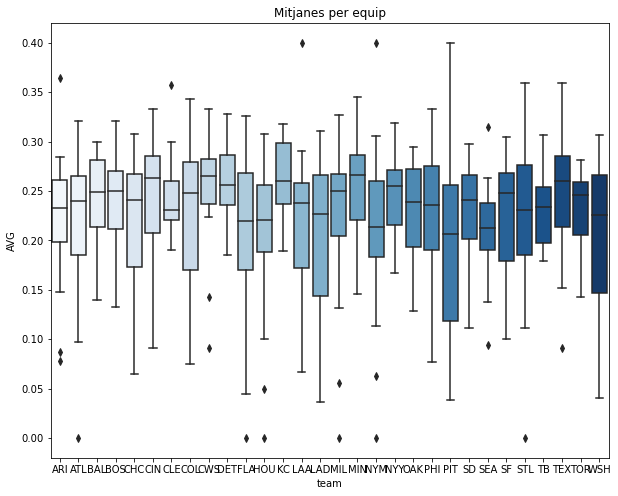

In [26]:
# grafiquem per equip
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot(data=dades, x='team', y='AVG', palette='Blues')
ax.set_title('Mitjanes per equip')

#### Describim els diferents grups

In [27]:
summary_t = dades.groupby('team').AVG.describe()
summary_t

,count,mean,std,min,25%,50%,75%,max
team,,,,,,,,
ARI,25.0,0.224320,0.061869,0.078,0.19800,0.2330,0.26100,0.364
ATL,25.0,0.219000,0.075488,0.000,0.18500,0.2400,0.26500,0.321
BAL,21.0,0.248619,0.040703,0.140,0.21400,0.2490,0.28100,0.300
BOS,25.0,0.240680,0.049084,0.133,0.21100,0.2500,0.27000,0.321
CHC,23.0,0.220522,0.069646,0.065,0.17300,0.2410,0.26750,0.308
CIN,29.0,0.239207,0.065869,0.091,0.20700,0.2630,0.28500,0.333
CLE,21.0,0.242476,0.039828,0.190,0.22100,0.2310,0.26000,0.357
COL,28.0,0.227250,0.074856,0.075,0.17000,0.2480,0.27925,0.343
CWS,20.0,0.254500,0.055905,0.091,0.23700,0.2655,0.28250,0.333


In [28]:
# llista amb els valors de cada equip
list_t = []
equips = dades.team.unique()
for t in equips:
    list_t.append( dades[dades.team == t].AVG.to_list())

In [29]:
# ANOVA

scipy.stats.f_oneway(*list_t)

F_onewayResult(statistic=1.8140824349210605, pvalue=0.005882479007080758)

Segons la documentació de [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

The ANOVA test has important assumptions that must be satisfied in order
for the associated p-value to be valid.

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal.  This
   property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still
be possible to use the Kruskal-Wallis H-test (`scipy.stats.kruskal`)
although with some loss of power.

In [30]:
# comprovem que les desviacions estandard dels grups son equivalents. Toca test

res, p = scipy.stats.levene(*list_t)
print(f'p-value: {p}')

p-value: 0.00039661679228945423


per tant, veient que el p-value del test es tant baix, assumim que els grups no tenen la propietat de la Homoscedasticitat. 
Aplicarem un altre test per tal de posar a prova la hipòtesi

In [31]:
res, p = scipy.stats.kruskal(*list_t)
print(f'Kruskal-Wallis test:\n\testadística: {res}\tp-value: {p}')

Kruskal-Wallis test:
	estadística: 47.25216241207483	p-value: 0.017547901486531448


**Conclusió**
Rebutjem la hipòtesi nul·la

#### Amb statsmodels

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('AVG ~ team', data=dades).fit()

table = sm.stats.anova_lm(lm)
print(table)

             df    sum_sq   mean_sq         F    PR(>F)
team       29.0  0.224685  0.007748  1.814082  0.005882
Residual  707.0  3.019529  0.004271       NaN       NaN


Observem el mateix p-value que fent servir scipy. 
No provarem el test de Kruskal-Wallis ja que la [documentació](https://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.kruskal.html) ens diu que es el mateix que a scipy.

#### Provem amb més paràmetres
**position**

Plantejem la hipòtesi que els percentatges de bateig per posició son diferents.
- $H_0$: Les mitjanes de batada dels grups son iguals
- $H_1$: Hi ha almenys una mitjana de batada que no es igual

$\alpha = 0.05$

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

lm = ols('AVG ~ position', data=dades).fit()

table = sm.stats.anova_lm(lm)
print(table)

             df    sum_sq   mean_sq          F        PR(>F)
position    8.0  1.032530  0.129066  42.483598  7.305441e-56
Residual  728.0  2.211683  0.003038        NaN           NaN


La probabilitat es molt baixa, així que tenim força per rebutjar la $H_0$

#### Comparem posicions

In [34]:

comp = mc.MultiComparison(dades.AVG, dades.position )
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
-,1B,0.0669,0.309,-0.0214,0.1552,False
-,2B,0.088,0.0517,-0.0003,0.1763,False
-,3B,0.0772,0.1408,-0.011,0.1654,False
-,C,0.066,0.314,-0.0214,0.1534,False
-,DH,0.0748,0.2232,-0.0175,0.1672,False
-,OF,0.0774,0.1228,-0.0091,0.1639,False
-,P,-0.0254,0.9,-0.1126,0.0618,False
-,SS,0.0748,0.1739,-0.0135,0.1631,False
1B,2B,0.021,0.4139,-0.0088,0.0509,False
1B,3B,0.0103,0.9,-0.0192,0.0398,False


**Conclusions**  
Observem que hi al comparar per parells, hi ha casos en que no rebutjariem la $H_0$.

Tot i això, la hipòtesi plantejada en aquest cas, ens permet acceptar la alternativa que les mitjanes de batada per posició són diferents segons la posició.